# Generate histogram of releases
Code Author: Sahar El Abbadi
Date started: 2023-03-14
Date last edited: 2023-03-14

Notebook objective: to generate a histogram of Stanford releases, categorizing release by type:
- True Positive
- True Negative
- False Negative
- False Positive
- Missing data - overpass recorded in field but not as an overpass by the team
- Stanford Filtered
- Operator Filtered

#### Carbon Mapper Summary

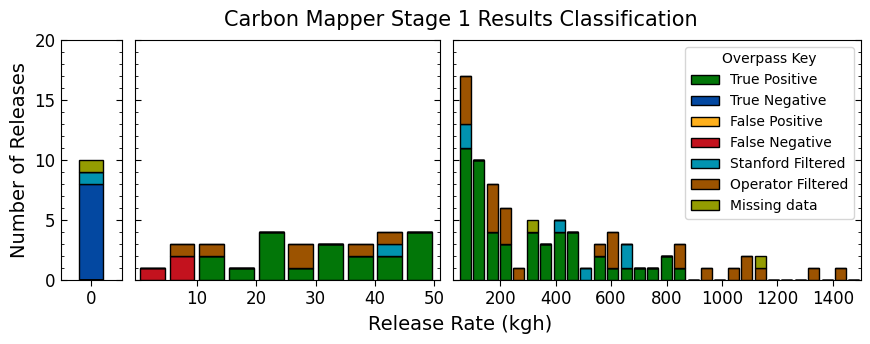

In [1]:
from plot_methods import make_releases_histogram
from methods_source import classify_histogram_data

operator='Carbon Mapper'
stage=1
strict_discard=False

make_releases_histogram(operator, stage, strict_discard)

##### Release summary
Summarize total number of releases conducted by Stanford. This includes releases conducted by Stanford that were not reported by the operator (ie, missing data).

In [2]:
# Obtain summary of all data
operator='Carbon Mapper'
stage=1
strict_discard=False

threshold_lower = 0
threshold_upper = 2000
n_bins = 1
cm_summary = classify_histogram_data(operator, stage, strict_discard,
                                           threshold_lower, threshold_upper, n_bins)
cm_releases = cm_summary['total_releases'].values[0]
cm_reported = cm_summary['total_reported'].values[0]
print(f'Stanford conducted {cm_releases:0.0f} releases for {operator}. Of these, {operator} reported data acquisition for {cm_reported:0.0f} overpasses.')

Stanford conducted 124 releases for Carbon Mapper. Of these, Carbon Mapper reported data acquisition for 121 overpasses.


#### GHGSat Summary

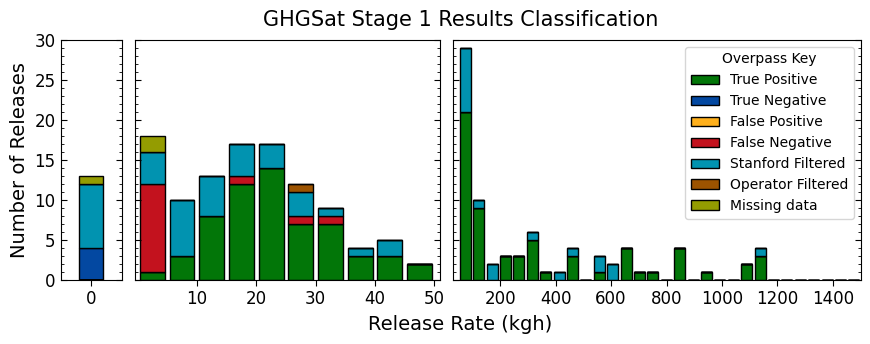

In [3]:
from plot_methods import make_releases_histogram
from methods_source import classify_histogram_data

# Make GHGSat histogram
operator='GHGSat'
stage=1
strict_discard=False

make_releases_histogram(operator, stage, strict_discard)

##### Release summary
Summarize total number of releases conducted by Stanford. This includes releases conducted by Stanford that were not reported by the operator (ie, missing data).

In [4]:
# Obtain summary of all data
operator='GHGSat'
stage=1
strict_discard=False

threshold_lower = 0
threshold_upper = 2000
n_bins = 1
ghg_summary = classify_histogram_data(operator, stage, strict_discard,
                                           threshold_lower, threshold_upper, n_bins)
ghg_releases = ghg_summary['total_releases'].values[0]
ghg_reported = ghg_summary['total_reported'].values[0]
print(f'Stanford conducted {ghg_releases:0.0f} releases for {operator}. Of these, {operator} reported data acquisition for {ghg_reported:0.0f} overpasses.')

Stanford conducted 195 releases for GHGSat. Of these, GHGSat reported data acquisition for 192 overpasses.


#### Kairos Summary

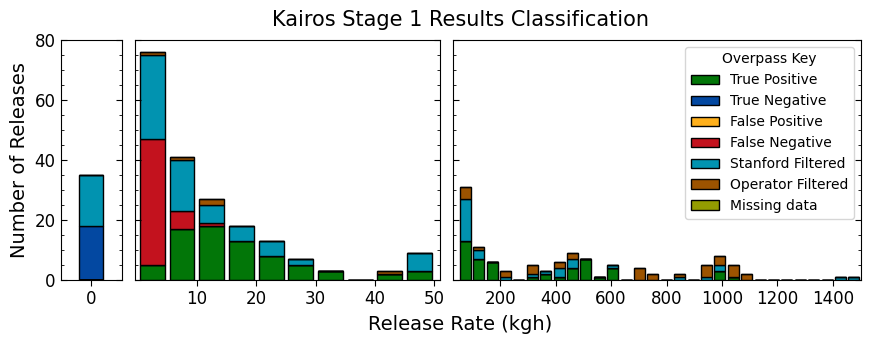

In [5]:
from plot_methods import make_releases_histogram
from methods_source import classify_histogram_data

operator='Kairos'
stage = 1
strict_discard = False
make_releases_histogram(operator, stage, strict_discard)

#### Release summary
Summarize total number of releases conducted by Stanford. This includes releases conducted by Stanford that were not reported by the operator (ie, missing data).

In [6]:
# Obtain summary of all data
operator='Kairos'
stage = 1
strict_discard = False

threshold_lower = 0
threshold_upper = 2000
n_bins = 1
kairos_summary = classify_histogram_data(operator, stage, strict_discard,
                                           threshold_lower, threshold_upper, n_bins)
kairos_releases = kairos_summary['total_releases'].values[0]
kairos_reported = kairos_summary['total_reported'].values[0]
print(f'Stanford conducted {kairos_releases:0.0f} releases for {operator}.  Of these, {operator} reported data acquisition for {kairos_reported:0.0f} overpasses.')

Stanford conducted 349 releases for Kairos.  Of these, Kairos reported data acquisition for 349 overpasses.


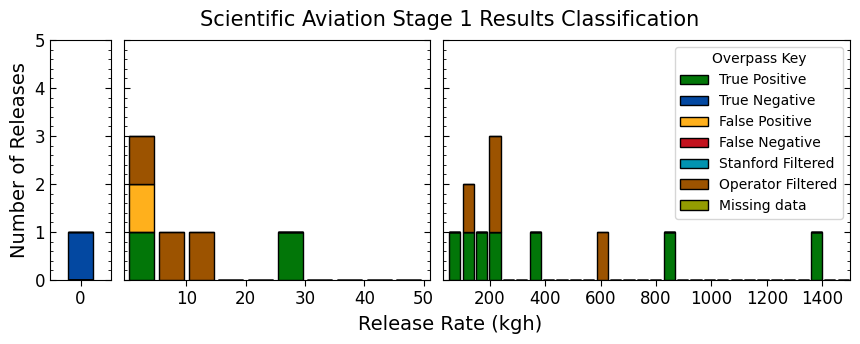

In [7]:
from plot_methods import make_releases_histogram

operator='Scientific Aviation'
stage = 1
strict_discard = False
make_releases_histogram(operator, stage, strict_discard)

In [8]:
# Obtain summary of all data
operator='Scientific Aviation'
stage = 1
strict_discard = False

threshold_lower = 0
threshold_upper = 2000
n_bins = 1
sciav_summary = classify_histogram_data(operator, stage, strict_discard,
                                           threshold_lower, threshold_upper, n_bins)
sciav_releases = sciav_summary['total_releases'].values[0]
sciav_reported = sciav_summary['total_reported'].values[0]
print(f'Stanford conducted {sciav_releases:0.0f} releases for {operator}. Of these, {operator} reported data acquisition for {sciav_reported:0.0f} flights.')

Stanford conducted 18 releases for Scientific Aviation. Of these, Scientific Aviation reported data acquisition for 18 flights.


#### Mair Summary

#TODO make MAIR histogram

##### Release Summary

In [12]:
# Hard code this for now, while waiting on MAIR to report their results
#TODO add summary calcs for MAIR
mair_releases = 26

#### Summary of total airplane releases
Calculate the total number of releases conducted by Stanford for all operators:


In [37]:
total_releases = cm_releases + ghg_releases + kairos_releases + sciav_releases + mair_releases
print(f'Over the testing period, Stanford conducted a total of {total_releases:0.0f} releases')

Over the testing period, Stanford conducted a total of 712 releases


##### Negative Controls
Calculate total number of zero releases across all the releases:

In [40]:
from methods_source import abbreviate_op_name
import pandas as pd

operators = ['Carbon Mapper', 'GHGSat', 'Kairos', 'Scientific Aviation', 'Methane Air']

# Load histogram files prepared above
operator_histo = {
    'cm': cm_summary,
    'ghg': ghg_summary,
    'kairos': kairos_summary,
    'sciav': sciav_summary,
    'mair': [],
}
zeros_count = 0
zeros_dict = {}
for operator in operators:
    op_ab = abbreviate_op_name(operator)

    if operator == 'Methane Air': #TODO fix when MAIR is added later
        zeros_dict[op_ab] = 3
    else:
        op_summary = operator_histo[op_ab]

        # Total zeroes will be the true zeros + false positives + zeros filtered by SU + zeros filtered by operator + missing zeros
        op_true_zero = op_summary.true_negative
        op_false_positive = op_summary.false_positive
        op_zero_filter_su = op_summary.zero_filter_su
        op_zero_filter_op = op_summary.zero_filter_op
        op_zero_missing = op_summary.zero_missing
        zeros_dict[op_ab] = op_true_zero + op_false_positive + op_zero_filter_su + op_zero_filter_op + op_zero_missing
    zeros_count = zeros_count + zeros_dict[op_ab]

zeros_summary = pd.DataFrame(zeros_dict)
#TODO: NEXT, compare this with loading operator overpass summary and counting "zero_release = True" and adding any missing zero data. Make sure I get the same numbers for both

percent_zero = zeros_count / total_releases * 100
print(f'Total number of zeroes conducted in the entire experiment is: {zeros_count.loc[0]:0.0f}, making up {percent_zero.loc[0]:0.2f}% of all releases.')
print('Zero releases conducted for each operator:')
print(f'- Carbon Mapper: {zeros_summary.cm[0]:0.0f}')
print(f'- GHGSat: {zeros_summary.ghg[0]:0.0f}')
print(f'- Kairos: {zeros_summary.kairos[0]:0.0f}')
print(f'- Scientific Aviation: {zeros_summary.sciav[0]:0.0f}')
print(f'- Methane Air:  {zeros_summary.mair[0]:0.0f}')

#TODO add MAIR zeroes to summary

Total number of zeroes conducted in the entire experiment is: 63, making up 8.85% of all releases.
Zero releases conducted for each operator:
- Carbon Mapper: 10
- GHGSat: 13
- Kairos: 35
- Scientific Aviation: 2
- Methane Air:  3


## Supplemental Information

Make figures for supplemental information: histograms for Kairos LS23 and LS25 pods

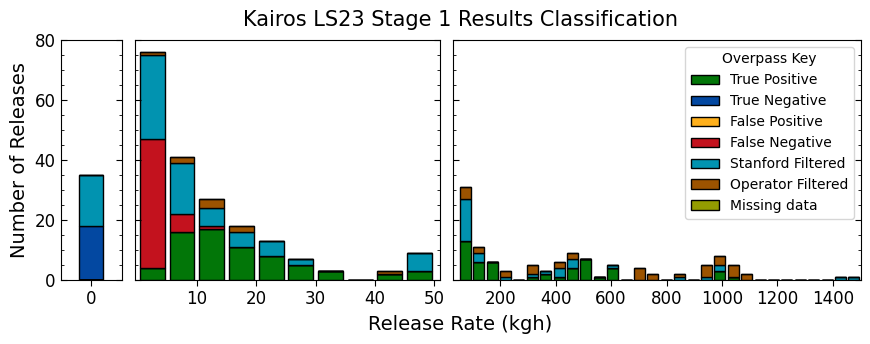

In [9]:
operator='Kairos LS23'
stage = 1
strict_discard = False
make_releases_histogram(operator, stage, strict_discard)

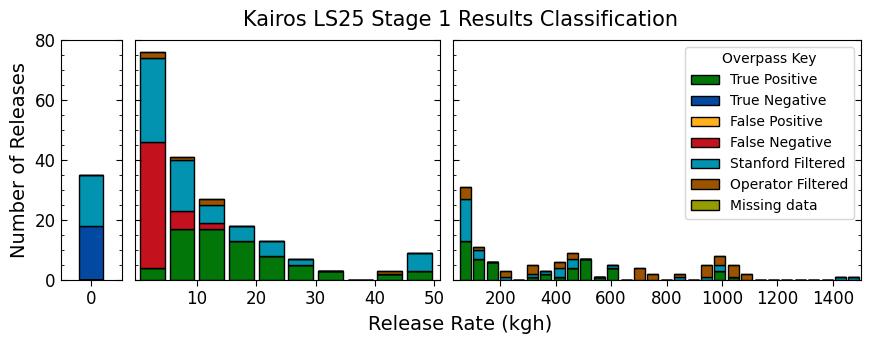

In [10]:
operator='Kairos LS25'
stage = 1
strict_discard = False
make_releases_histogram(operator, stage, strict_discard)